# Wind Stress

Mean zonal wind stress profile

## Theory

Wind stress, $\tau$, transfers momentum from the atmosphere to the ocean.

## Calculation

In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from joblib import Memory

memory = Memory(cachedir='/g/data1/v45/cosima-cookbook/', verbose=0)

In [3]:
cc.start_cluster(diagnostics_port=8787)

Run this command on a local terminal to set up SSH tunnels for dashboard:

  ssh -N -L 8787:127.0.0.1:8787 vdi-n11.nci.org.au -l jm0634


Client Scheduler: tcp://127.0.0.1:33145 Dashboard: http://127.0.0.1:8787,Cluster Workers: 4 Cores: 8 Memory: 24.00 GB


The following code block shows the zonal- and time-averaged wind stress forcing for each experiment.

In [20]:
@memory.cache
def calc_mean_tau_x(expt, n=12):
    
    tau_x = cc.get_nc_variable(expt, 'ocean_month.nc', 
                              'tau_x', 
                               n=n,
                               chunks={'xu_ocean':None})

    mean_tau_x = tau_x.mean('xu_ocean').mean('time')
    mean_tau_x = mean_tau_x.compute()
    mean_tau_x.name = expt
    
    return mean_tau_x

In [8]:
expts = cc.get_experiments('mom01v5')[:4]
expts

['GFDL50', 'KDS75', 'KDS75_PI', 'KDS75_UP']

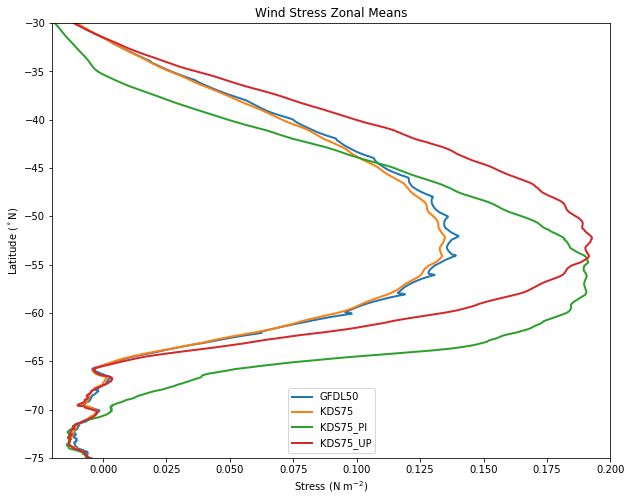

In [21]:
plt.figure(figsize=(10,8))

for expt in expts:
    mean_tau_x = calc_mean_tau_x(expt)
    plt.plot(mean_tau_x, mean_tau_x.yu_ocean,
             linewidth=2,
             label=expt)

plt.ylim([-75,-30])
plt.xlim([-0.02,0.2])
plt.ylabel('Latitude ($^\circ$N)')
plt.xlabel('Stress (N m$^{-2}$)')
plt.legend(loc=8, fontsize=10)
plt.title('Wind Stress Zonal Means')
plt.show()